<a href="https://colab.research.google.com/github/Dharil33/Univariate-Time-Series-LSTM/blob/main/Univariate_Time_Series_Forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
def preparing_data(timeseries_data,steps):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    end_pred = i + steps
    if end_pred > len(timeseries_data)-1:
      break
    seq_x,seq_y = timeseries_data[i:end_pred],timeseries_data[end_pred]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X),np.array(y)

In [4]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
steps = 3
seq_x,seq_y = preparing_data(timeseries_data,steps)

In [7]:
print(seq_x),print(seq_y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [9]:
seq_x.shape

(6, 3)

In [10]:
#when we apply LSTM always do reshape and convert into 3D
n_features = 1
seq_x = seq_x.reshape((seq_x.shape[0],seq_x.shape[1],n_features))

In [11]:
seq_x

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

In [12]:
model = Sequential()
model.add(LSTM(50,activation="relu",return_sequences=True,input_shape=(steps,n_features)))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.fit(seq_x,seq_y,epochs=300,verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 33786.9219
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 33307.6094
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 32854.6914
Epoch 4/300
1/1 [==============================] - 0s 13ms/step - loss: 32402.0996
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 31886.2109
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 31282.1641
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 30620.2207
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 29954.6582
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 29319.6348
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 28731.4551
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 28195.9395
Epoch 12/300
1/1 [==============================] - 0s 6ms/step - loss: 27632.6309
Epoch 13/

In [23]:
x_input = np.array([187,196,210])
temp_input = list(x_input)
output = []
i = 0
while i < 10:
  if len(temp_input) > 3:
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape((1, steps, n_features))
    y_pred = model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,y_pred))
    temp_input.append(y_pred[0][0])
    temp_input = temp_input[1:]
    output.append(y_pred[0][0])
    i = i+1
  else:
     x_input = x_input.reshape((1, steps, n_features))
     y_pred = model.predict(x_input, verbose=0)
     print(y_pred[0])
     temp_input.append(y_pred[0][0])
     output.append(y_pred[0][0])
     i=i+1
print(output)

[225.73935]
1 day input [196.         210.         225.73934937]
1 day output [[237.70486]]
2 day input [210.         225.73934937 237.7048645 ]
2 day output [[252.84451]]
3 day input [225.73935 237.70486 252.84451]
3 day output [[268.55896]]
4 day input [237.70486 252.84451 268.55896]
4 day output [[283.1212]]
5 day input [252.84451 268.55896 283.1212 ]
5 day output [[299.84583]]
6 day input [268.55896 283.1212  299.84583]
6 day output [[317.01135]]
7 day input [283.1212  299.84583 317.01135]
7 day output [[334.29434]]
8 day input [299.84583 317.01135 334.29434]
8 day output [[353.22632]]
9 day input [317.01135 334.29434 353.22632]
9 day output [[372.7989]]
[225.73935, 237.70486, 252.84451, 268.55896, 283.1212, 299.84583, 317.01135, 334.29434, 353.22632, 372.7989]


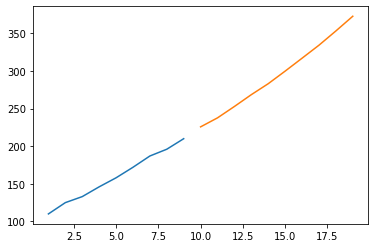

In [24]:
import matplotlib.pyplot as plt
day_new = np.arange(1,10)
day_pred = np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,output)